# Análise Exploratória - Teste Data Science Elo7

Nesse notebook será feita uma análise exploratória dos dados disponíveis para o case da etapa teórica do processo seletivo para a vaga no time Data Science do Elo7. Os insights encontrados serão utilizados para criar um modelo de classificação de produto e outro de recomendação.

O dataset utilizado pode ser encontrado nesse [link](https://elo7-datasets.s3.amazonaws.com/data_scientist_position/elo7_recruitment_dataset.csv), e ele foi baixado na data 28/03/2022. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('../data/elo7_recruitment_dataset.csv')

## 1 - Análise Exploratória

In [3]:
print(df.shape)
df.head()

(38507, 15)


,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


In [4]:
print(f'Produtos únicos: {df.product_id.nunique()}')

Produtos únicos: 29801


In [5]:
df.category.value_counts(normalize=True)

Lembrancinhas         0.461189
Decoração             0.229724
Bebê                  0.182460
Papel e Cia           0.072117
Outros                0.029813
Bijuterias e Jóias    0.024697
Name: category, dtype: float64

Será necessário utilizar algum método de balanceamento para corrigir essa diferença de proporções do target pois ele é bem desbalanceado.

### 1 - Entendimento do Negócio

- A - Como estão as distribuições dos dados?
- B - Quais são os campos Nulos?
- C - O mesmo produto aparece em diversas consultas diferentes?
- D - Os vendedores costumam vendem vários produtos?
- E - Os vendedores costumam vender só uma categoria de produto?
- F - Quantos termos a query possuí?
- G - Em qual página o produto estava quando foi clicado?
- H - Quantas tags os produtos tem?
- I - Qual é o formato de texto das tags?
- J - Preço e peso estão relacionados a categoria? 
- K - A variável 'express_delivery' diferencia alguma categoria?
- L - A variável 'minimum_quantity' diferencia alguma categoria?
- M - As categorias possuem um número diferente de views?
- N - As categorias possuem um número diferente de compras?
- O - Qual o período que os produtos foram cadastrados?
- P - Será que vale tem alguma variável muito correlacionada com peso para utilizá-la para preencher os missings?

### 2 - Entendimento dos dados

Variáveis numéricas
- search page
- position
- creation_date (transformada em dias até hoje)
- price
- weight
- minimum quantity
- view counts
- order counts

Variáveis categóricas
- product_id
- seller_id
- query
- title
- concatenated_tags
- express_delivery
- category

- A - Como estão as distribuições dos dados?

In [6]:
df.describe()

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts
count,3.850700e+04,3.850700e+04,38507.000000,38507.000000,38507.000000,38449.000000,38507.000000,38507.000000,38507.000000,18117.00000
mean,8.342724e+06,5.009902e+06,1.491885,16.889007,84.054157,361.836745,0.780637,14.596567,545.520503,27.38141
std,4.834912e+06,2.947791e+06,0.980570,11.588534,211.805310,1820.814735,0.413820,43.768937,1416.508602,60.53336
min,3.610000e+02,8.170000e+02,1.000000,0.000000,0.070000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,4.142514e+06,2.472772e+06,1.000000,6.000000,12.750000,6.000000,1.000000,3.000000,119.000000,8.00000
50%,8.375490e+06,4.917720e+06,1.000000,16.000000,28.490000,9.000000,1.000000,7.000000,242.000000,15.00000
75%,1.253089e+07,7.640886e+06,2.000000,27.000000,90.000000,107.000000,1.000000,16.000000,521.000000,26.00000
max,1.669295e+07,1.011887e+07,5.000000,38.000000,11509.380000,65009.000000,1.000000,3000.000000,45010.000000,2460.00000


- B - Quais são os campos Nulos?

In [7]:
df.isnull().sum().sort_values(ascending=False)

order_counts         20390
weight                  58
concatenated_tags        2
product_id               0
seller_id                0
query                    0
search_page              0
position                 0
title                    0
creation_date            0
price                    0
express_delivery         0
minimum_quantity         0
view_counts              0
category                 0
dtype: int64

A variável 'weight' pode estar com peso 0 ou nulo.

In [8]:
base_color = sns.color_palette()[0]

- C - O mesmo produto aparece em diversas consultas diferentes?

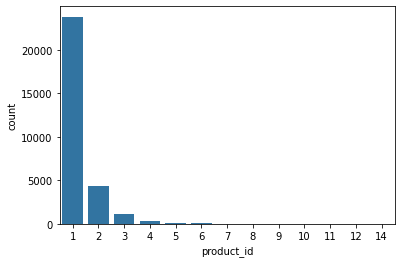

In [9]:
sns.countplot(x=df.product_id.value_counts(), color=base_color);

A maioria dos produtos que estão no dataset aparecem no máximo 2 vezes

- D - Os vendedores costumam vendem vários produtos?

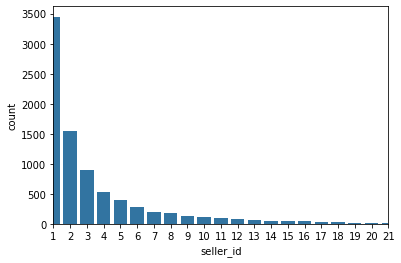

In [10]:
sns.countplot(x=df.seller_id.value_counts(), color=base_color);
plt.xlim(0, 20);

Os vendedores vendem poucos produtos no geral

- E - Os vendedores costumam vender só uma categoria de produto?

In [11]:
seller_cats = df[['seller_id', 'product_id', 'category']].drop_duplicates()
seller_cats = seller_cats.groupby(['seller_id', 'category']).product_id.count()

In [12]:
print(f'{round((seller_cats > 1).mean()*100, 2)}% dos vendedores vendem mais de um produto')

46.13% dos vendedores vendem mais de um produto


In [13]:
seller_unique_cats = seller_cats[seller_cats > 1].groupby('seller_id').count()

In [14]:
print(f'{round((seller_unique_cats == 1).mean()*100, 2)}% dos vendedores que possuem 2 produtos ou mais, vendem uma única categoria de produto. Ou seja, uma heurística interessante é supor que um novo produto cadastrado pelo mesmo vendedor será da mesma categoria.')

92.29% dos vendedores que possuem 2 produtos ou mais, vendem uma única categoria de produto. Ou seja, uma heurística interessante é supor que um novo produto cadastrado pelo mesmo vendedor será da mesma categoria.


- F - Quantos termos a query possuí?

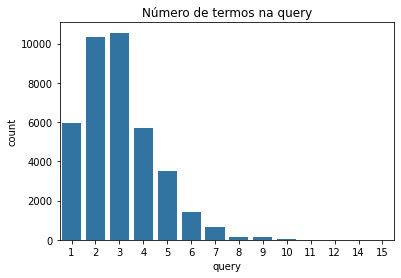

In [15]:
sns.countplot(x=df['query'].str.split().apply(lambda x: len(x)), color=base_color);
plt.title('Número de termos na query');

- G - Em qual página o produto estava quando foi clicado?

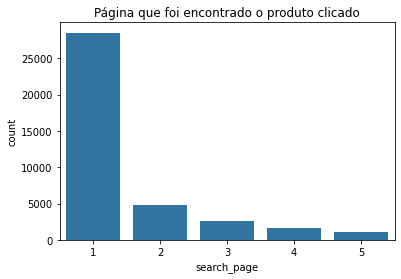

In [16]:
sns.countplot(x=df.search_page, color=base_color);
plt.title('Página que foi encontrado o produto clicado');

O sistema de recomendação atual está funcionando razoavelmente no nível página, pois os cliques acontecem na maioria na primeira página

- H - Quantas tags os produtos tem?

In [17]:
tags = df.concatenated_tags.str.split()

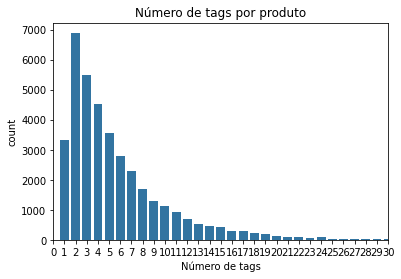

In [18]:
sns.countplot(x=tags.fillna('').apply(lambda x: len(x)), color=base_color);
plt.xlim(0, 30);
plt.title('Número de tags por produto');
plt.xlabel('Número de tags');

A maioria possuí de 2 a 4 tags.

- I - Qual é o formato de texto das tags?

In [19]:
unique_tags = set(tags.dropna().sum())

In [20]:
list(unique_tags)[:20]

['minhaa',
 'cairo',
 'culote',
 'festa1anoemma',
 '50ml',
 'escandinavo',
 'estantes',
 'comes',
 'pixar',
 'apostila',
 'mitzvah',
 'luara',
 'gus',
 'copo,canecas,baldes',
 'cordel',
 'tira',
 '300',
 'bandeirola',
 'locao',
 '250']

A variável tag é campo aberto, esperava que fosse um número limitado de opções

- J - Preço e peso estão relacionados a categoria? 
Obs. provavelmente peso seja menos confiável porque ele é fornecido pelo vendedor

Foi aplicado uma escala logaritmica no preço e peso para ficar mais fácil a visualização

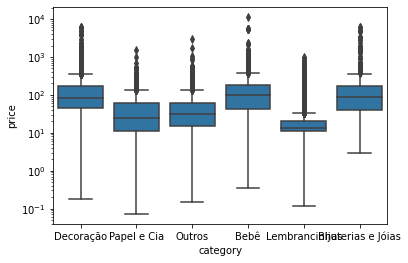

In [21]:
sns.boxplot(x=df.category, y=df.price, color=base_color);
plt.yscale('log');

As categorias decoração, Bebê e Bijuterias e Jóias tem uma tendência de terem preços mais elevados.
E lembrancinhas tendem a ter preços menores.

In [22]:
clean_weight = df[~(df.weight.isnull()) & (df.weight != 0)]

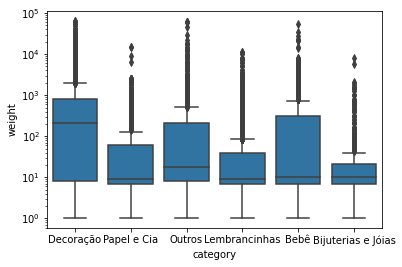

In [23]:
sns.boxplot(x=clean_weight.category, y=clean_weight.weight, color=base_color);
plt.yscale('log');

Decoração tende a pesar mais. Papel e Cia, Lembrancinhas e Bijuterias e Jóias a pesarem menos.

- K - A variável 'express_delivery' diferencia alguma categoria?

In [24]:
prop_express_delivery = df.groupby('category').express_delivery.mean()
prop_express_delivery.sort_values(ascending=False, inplace=True)

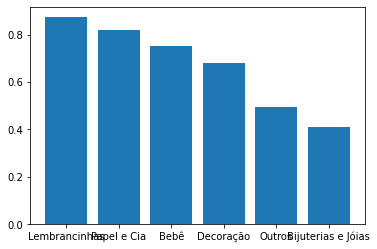

In [25]:
plt.bar(prop_express_delivery.index, prop_express_delivery);

A categoria Bijuteria e Jóias tem uma proporção consideravelmente menor a pronta entrega, porém ela só contempla 2,5% da nossa base.

- L - A variável 'minimum_quantity' diferencia alguma categoria?

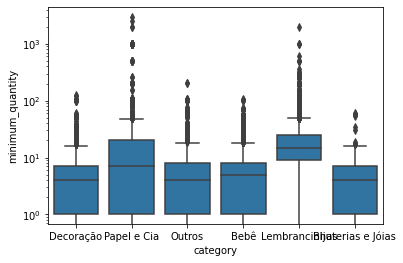

In [26]:
sns.boxplot(x=df.category, y=df.minimum_quantity, color=base_color);
plt.yscale('log');

Lembrancinhas tem pedidos mínimos com valores maiores. E papel e cia também possuí uma leve diferenciação.

- M - As categorias possuem um número diferente de views?

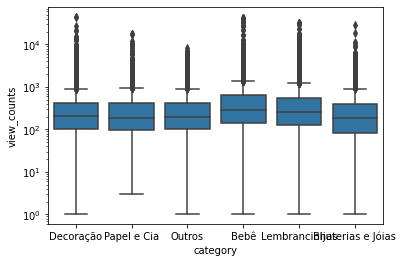

In [27]:
sns.boxplot(x=df.category, y=df.view_counts, color=base_color);
plt.yscale('log');

Ambas categorias em questões de views são bem equilibradas.

- N - As categorias possuem um número diferente de compras?

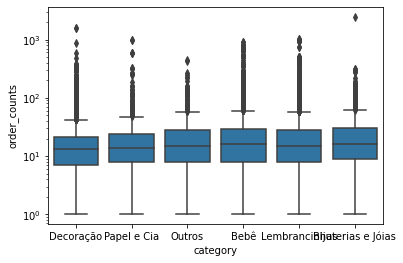

In [28]:
sns.boxplot(x=df.category, y=df.order_counts, color=base_color);
plt.yscale('log');

Ambas categorias em questões de compras são balanceadas também.

Para o classificador de categoria view_couts e order_counts não demonstram ser tão úteis, porém essas informações serão importantes para o sistema de recomendação.

- O - Qual o período que os produtos foram cadastrados?

In [29]:
today = '2022-03-29'

In [30]:
print (datetime.fromisoformat(today))

2022-03-29 00:00:00


In [31]:
df.creation_date.min()

'2008-11-05 22:57:17'

In [32]:
df.creation_date.max()

'2020-01-03 12:31:05'

In [33]:
df['days_since_creation'] = (datetime.fromisoformat(today) - df.creation_date.apply(datetime.fromisoformat)).dt.days

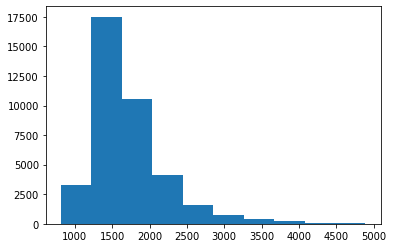

In [34]:
plt.hist(df.days_since_creation);

São produtos com pelo menos 2 anos na base. Em questão de temporalidade, já aconteceu muita coisa inclusive a pandemia.

- P - Será que vale tem alguma variável muito correlacionada com peso para utilizá-la para preencher os missings?

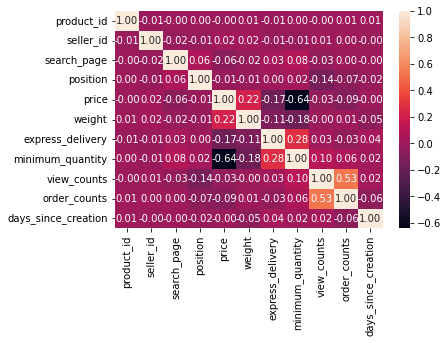

In [35]:
sns.heatmap(df.corr('spearman'), annot=True, fmt='.2f');

'price' e 'weight' tem a maior correlação, daria para usar intervalos do preço para calcular a mediana do peso para preencher os missings, mas a correlação é muito fraca.

In [36]:
miss_weight_pct = round(sum((df.weight.isnull())|(df.weight==0))/df.shape[0]*100, 2)

In [37]:
print(f'{miss_weight_pct}% de "weight" é missing, porém mesmo assim não vale a pena usar a informação de "price"')

11.57% de "weight" é missing, porém mesmo assim não vale a pena usar a informação de "price"
